In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/surface-crack-detection/Negative/08450.jpg
/kaggle/input/surface-crack-detection/Negative/19812.jpg
/kaggle/input/surface-crack-detection/Negative/16916.jpg
/kaggle/input/surface-crack-detection/Negative/05938.jpg
/kaggle/input/surface-crack-detection/Negative/06122.jpg
/kaggle/input/surface-crack-detection/Negative/08536.jpg
/kaggle/input/surface-crack-detection/Negative/12666.jpg
/kaggle/input/surface-crack-detection/Negative/04168.jpg
/kaggle/input/surface-crack-detection/Negative/13288.jpg
/kaggle/input/surface-crack-detection/Negative/02371.jpg
/kaggle/input/surface-crack-detection/Negative/04377.jpg
/kaggle/input/surface-crack-detection/Negative/09924.jpg
/kaggle/input/surface-crack-detection/Negative/00767.jpg
/kaggle/input/surface-crack-detection/Negative/07457.jpg
/kaggle/input/surface-crack-detection/Negative/10304.jpg
/kaggle/input/surface-crack-detection/Negative/02360.jpg
/kaggle/input/surface-crack-detection/Negative/14143.jpg
/kaggle/input/surface-crack-det

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, RMSprop, Adagrad
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
labels = ['Negative', 'Positive']
img_size = 120
def read_images(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

Dataset = read_images('../input/surface-crack-detection')

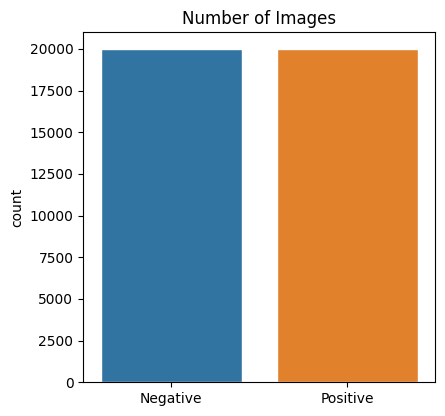

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Im = []
for i in Dataset:
    if i[1] == 0:
        Im.append("Negative")
    elif i[1] == 1:
        Im.append("Positive")

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(x=Im)  # Specify 'x' parameter to indicate categorical data
axl.set_title("Number of Images")
plt.show()



**Normalization of image data**

In [7]:
x = []
y = []

for feature, label in Dataset:
    x.append(feature)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 1)
x = x / 255
y = np.array(y)

(-0.5, 119.5, 119.5, -0.5)

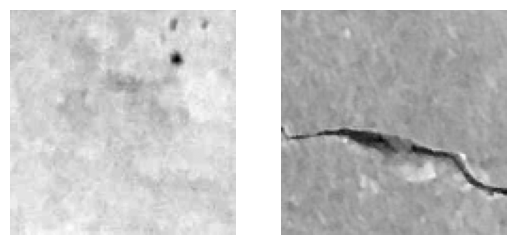

In [8]:
plt.subplot(1, 2, 1)
plt.imshow(x[1000].reshape(img_size, img_size), cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x[30000].reshape(img_size, img_size), cmap='gray')
plt.axis('off')

Convolutional neural networks (CNN) are a neural network method that can include multiple arrays created to process 2-dimensional arrays of three color components (Lecun et al., 2010). In images, edges called local features form patterns and these patterns combine into pieces, then pieces form objects (Bengio & Lecun, 1997). These properties are obtained in the convolution layer and these properties are brought into a format that can be semantically combined and processed in the pooling layer.

CNN; It is a type of algorithm that consists of an input, an output, and many hidden layers. The hidden layer includes convolution layer, pooling layer, rectified linear unit layer (ReLu), fully connected layer and classification sections (Lecun et al., 2010).

Convolution layer is used in convolutional neural networks to perform convolution process in multi-dimensional processes. This layer enables the adjustment of the neurons in the image matrix, which is defined as the input called feature map, and enables the learning of the properties.

ReLu fulfills the task of flattening the feature map that emerges after the convolution process. By converting negative values to zero, it produces output between zero and positive infinite values.

Pooling layer performs the size reduction operation by performing the function operation defined as subsampling (Kalchbrenner et al., 2014). In addition, thanks to this layer, excessive memorization is prevented.



In [9]:
model = Sequential()
model.add(Conv2D(64,3,padding="same", activation="relu", input_shape = x.shape[1:]))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 128)      0


Model Training
Accuracy can be increased by increasing the number of epochs.
Learning rate is also important here. Better results can be achieved by training at different learning rates. The best learning rate can be found by trying. Or grid search method can be used. But this increases the training time considerably.
If a low learning rate is selected; the training speed slows down, if the high learning rate is selected; the training will speed up, but the accuracy will decrease

In [11]:
opt = Adam(lr=1e-5)

model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]) 

history = model.fit(x, y, epochs = 1, batch_size = 128, validation_split = 0.25, verbose=1)

235/235 [==============================] - 894s 4s/step - loss: 0.2436 - accuracy: 0.9231 - val_loss: 0.3609 - val_accuracy: 0.9531


In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


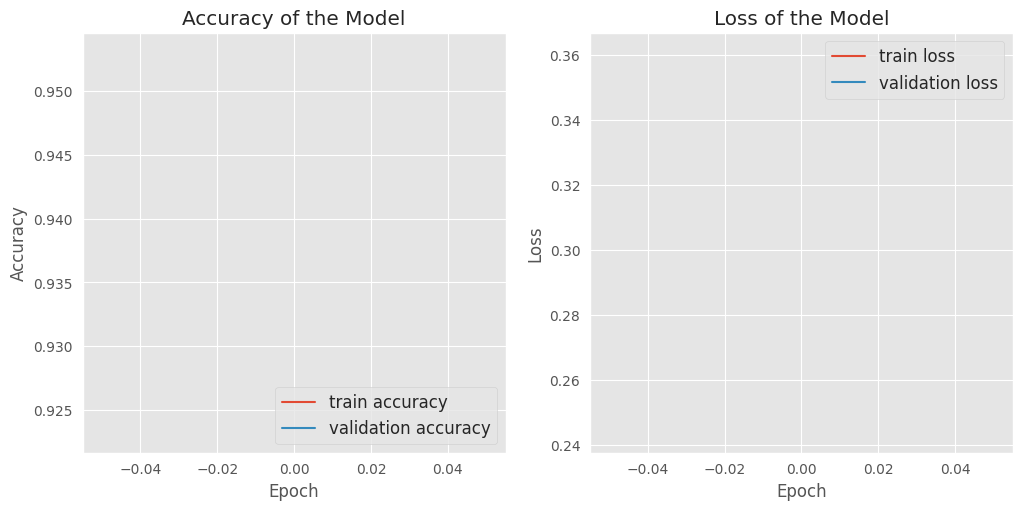

In [13]:
plt.figure(figsize=(12, 12))
plt.style.use('ggplot')
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of the Model')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right', prop={'size': 12})

plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of the Model')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train loss', 'validation loss'], loc='best', prop={'size': 12})